In [1]:
"""
July 7, 2020

Looking at results of the MCMCs.
"""

import ares
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
import distpy

In [2]:
# Independent variables
redshifts = np.sort(np.array([0.35, 0.875, 1.125, 1.75, 2.25, 2.75]))

Ms = np.linspace(7, 12, 60)

# blob 1: the smf
blob_n1 = ['galaxy_smf']
blob_i1 = [('z', redshifts), ('logbins', Ms)]
blob_f1 = ['StellarMassFunction']

In [4]:
# anl = ares.analysis.ModelSet('MCMC_files/fract_test4SQ')

anl = ares.analysis.ModelSet('..\Cedar\savedFits/sf_smf_06_08_12-01_0.0-3.0')


labels = \
{
     #A
    'pq_func_par0[7]': '$a_1$', #const
    'pq_func_par1[7]': '$a_0$', #offset
    'pq_func_par2[7]': '$m_a$', #m

    #B
    'pq_func_par0[8]': '$b_1$', #const
    'pq_func_par1[8]': '$b_0$', #offset
    'pq_func_par2[8]': '$m_b$', #m

    #C
    'pq_func_par0[9]': 'C', #const
    #D
    'pq_func_par0[10]': 'D', #const
}

anl.custom_labels = labels

# anl.skip = 128*100


##############################################################################################################
####                                         Analysis: Model Set                                          ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Basic Information                                                                                    ####
#### ---------------------------------------------------------------------------------------------------- ####
#### path        : ..\Cedar\savedFits/                                                                    ####
#### prefix      : sf_smf_06_08_12-01_0.0-3.0                                                             ####
#### N-d         : 8                                                                                      ####


In [22]:
data = anl.ExtractData(['galaxy_smf_Q'])
# print(data['galaxy_smf'])
# print(data['galaxy_sfrd'][0])

# print(data)

# Loaded ..\Cedar\savedFits\sf_smf_06_08_12-01_0.0-3.0.dd0000.blob_2d.galaxy_smf_Q.pkl
# Loaded ..\Cedar\savedFits\sf_smf_06_08_12-01_0.0-3.0.dd0001.blob_2d.galaxy_smf_Q.pkl
# Loaded ..\Cedar\savedFits\sf_smf_06_08_12-01_0.0-3.0.dd0002.blob_2d.galaxy_smf_Q.pkl
# Loaded ..\Cedar\savedFits\sf_smf_06_08_12-01_0.0-3.0.dd0003.blob_2d.galaxy_smf_Q.pkl
# Loaded ..\Cedar\savedFits\sf_smf_06_08_12-01_0.0-3.0.dd0004.blob_2d.galaxy_smf_Q.pkl
# Loaded ..\Cedar\savedFits\sf_smf_06_08_12-01_0.0-3.0.dd0005.blob_2d.galaxy_smf_Q.pkl
# Loaded ..\Cedar\savedFits\sf_smf_06_08_12-01_0.0-3.0.dd0006.blob_2d.galaxy_smf_Q.pkl
# Loaded ..\Cedar\savedFits\sf_smf_06_08_12-01_0.0-3.0.dd0007.blob_2d.galaxy_smf_Q.pkl
# Loaded ..\Cedar\savedFits\sf_smf_06_08_12-01_0.0-3.0.dd0008.blob_2d.galaxy_smf_Q.pkl
# Loaded ..\Cedar\savedFits\sf_smf_06_08_12-01_0.0-3.0.dd0009.blob_2d.galaxy_smf_Q.pkl
# Loaded ..\Cedar\savedFits\sf_smf_06_08_12-01_0.0-3.0.dd0010.blob_2d.galaxy_smf_Q.pkl
# Loaded ..\Cedar\savedFits\sf_smf_06_08_12

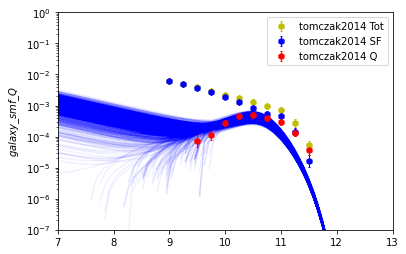

In [23]:
#look at the raw LF samples

z = 1.75

gpop = ares.analysis.GalaxyPopulation()

ax = anl.ReconstructedFunction('galaxy_smf_Q', ivar=[z, None], samples='all', color='b', alpha=0.01)

# Plot any data within dz=0.1 of z=6
# gpop.PlotSMF(z, ax=ax, round_z=0.2, log10Mass=True)
gpop.PlotSMF(z, sources="tomczak2014", color="y", ecolor='y', mec='y', label="tomczak2014 Tot", quantity="smf_tot", ax=ax, round_z=0.2, log10Mass=True)
gpop.PlotSMF(z, sources="tomczak2014",  label="tomczak2014 SF", color="b", ecolor='b',  mec='b', ax=ax, round_z=0.2, log10Mass=True)
gpop.PlotSMF(z, sources="tomczak2014", color="r", ecolor='r',  mec='r', label="tomczak2014 Q", quantity="smf_q", ax=ax, round_z=0.2, log10Mass=True)

# ax.set_ylim(1e-35, 1)
# ax.set_xlim(1e7, 1e13)

ax.legend()
pl.show()

In [9]:
params = \
[
     #A
    'pq_func_par0[7]',
    'pq_func_par1[7]',
    'pq_func_par2[7]', 

    #B
    'pq_func_par0[8]',
    'pq_func_par1[8]', 
    'pq_func_par2[8]',

    #C
    'pq_func_par0[9]',
    #D
    'pq_func_par0[10]', 

]

# print(anl.nwalkers)

0 of 4200 chain elements ignored because of chain links with inf's/nan's.


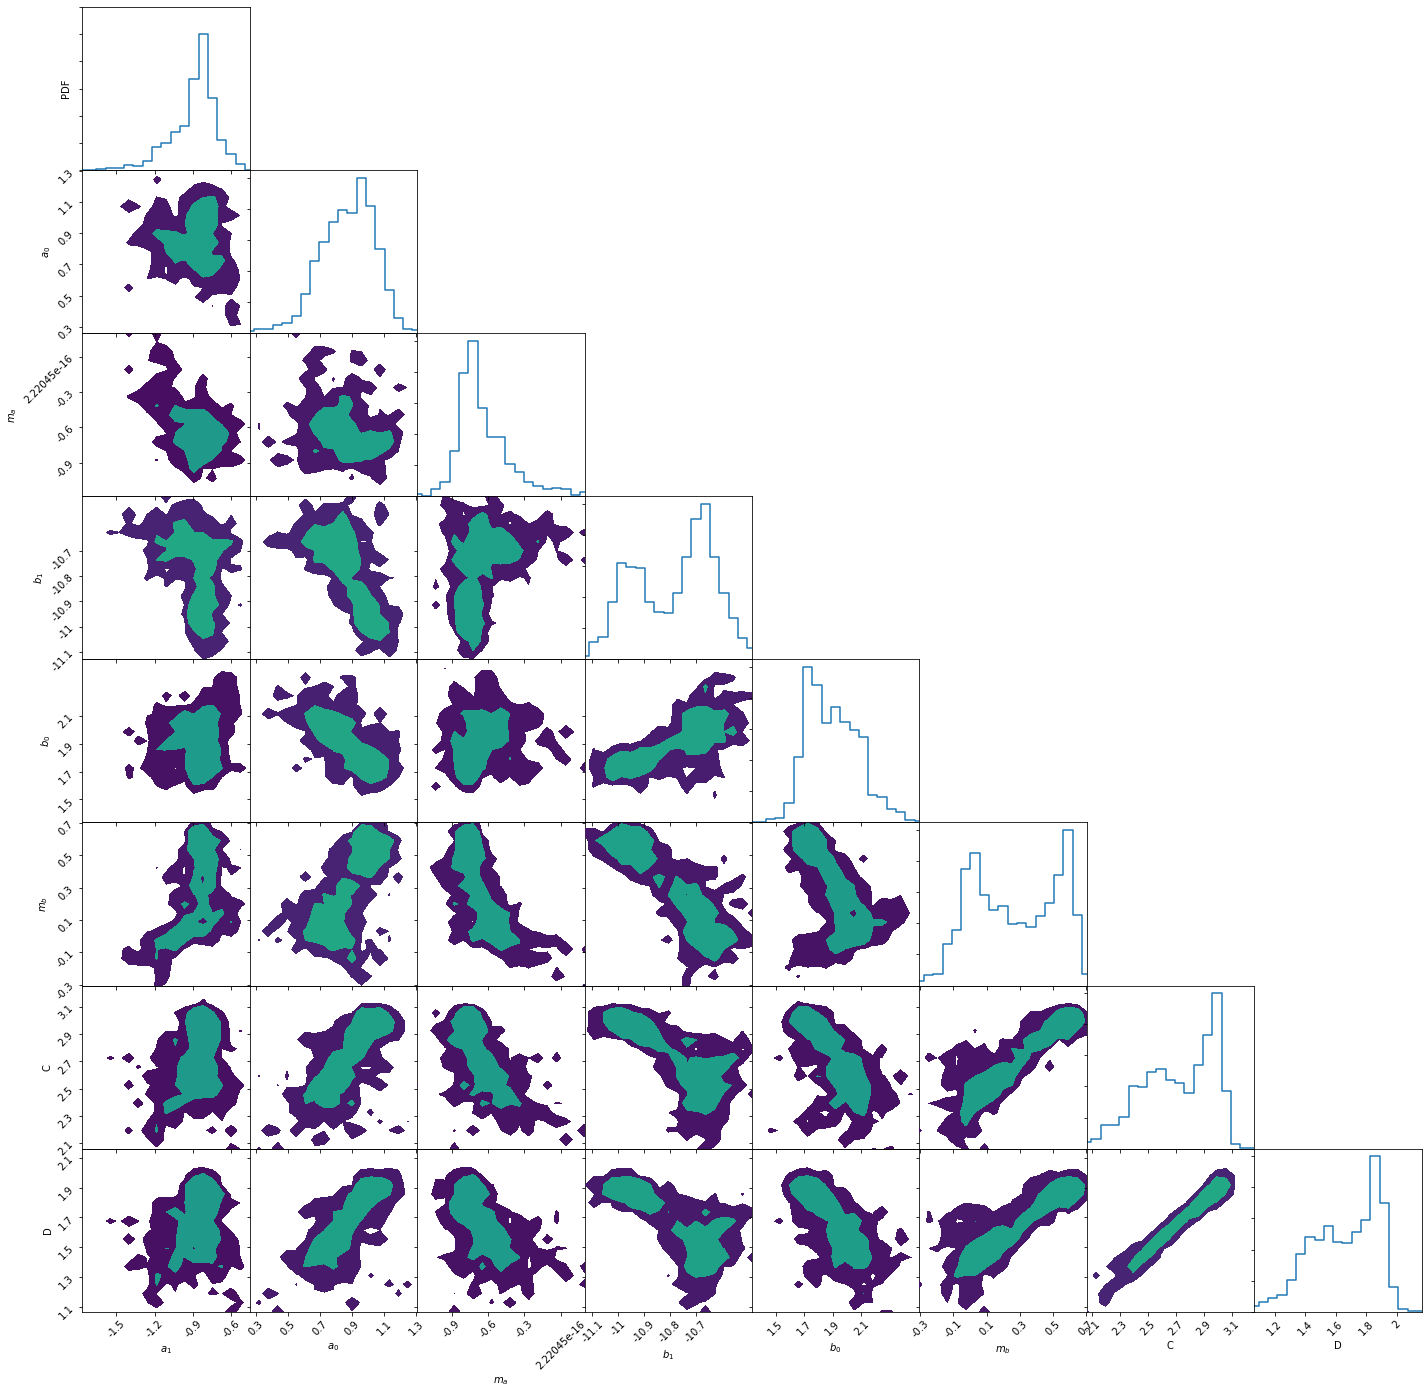

In [10]:
trig = anl.TrianglePlot(pars=params, color_by_like=True)

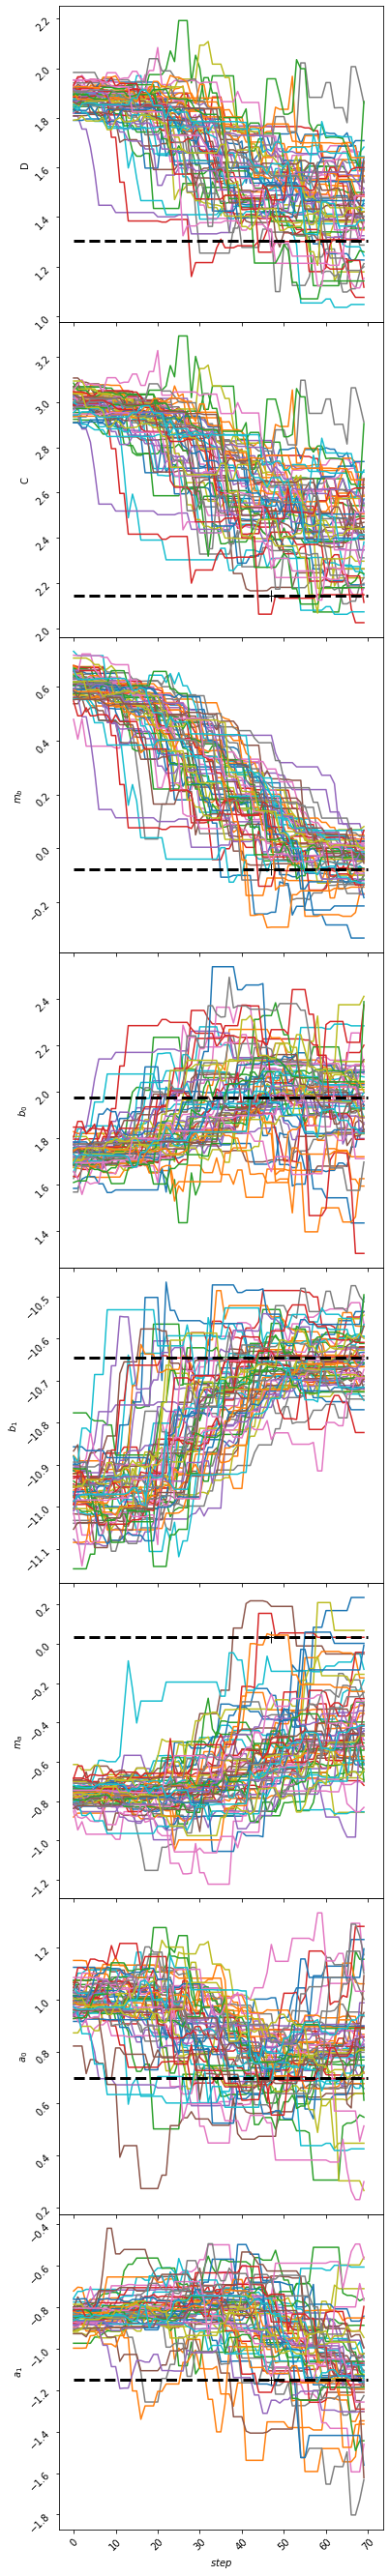

In [11]:
anl.WalkerTrajectoriesMultiPlot(best_fit='mode')

In [12]:
# print(anl.max_likelihood_parameters())

covar = anl.CovarianceMatrix(params)

In [13]:
pars_ch = {}
for i in range(len(covar[0])):
    pars_ch[params[i]] = covar[0][i]
    
pars_mean = ares.util.ParameterBundle("emma:model1")

pars_mean.update(pars_ch, pop_sf_type='sf')
# print(pars_best)
pop_mean = ares.populations.GalaxyPopulation(**pars_mean)

In [14]:
fit_best_like = anl.max_likelihood_parameters()

fit_best_median = anl.max_likelihood_parameters()

# print(fit_best_like)

for i in range(len(covar[0])):
#     print(fit_best_like[params[i]])
    print(anl.get_1d_error(params[i], peak="mode")) #(maximum likelihood value, positive error, negative error).
#     print(params[i], anl.get_1d_error(params[i], peak="mode")[0])
    fit_best_median[params[i]] = anl.get_1d_error(params[i], peak="median")[0]


(-1.149608289215811, array([ 0.40542676, -0.08737546]))
(0.6978408452765579, array([ 0.3375906 , -0.00070892]))
(0.036176909636038035, array([-0.48608269,  0.84475559]))
(-10.64620767041986, array([0.01272906, 0.32058784]))
(1.9760866013767633, array([0.11295843, 0.25748526]))
(-0.07888656505654784, array([ 0.65113442, -0.06628471]))
(2.1464622501406296, array([ 0.84161258, -0.27926748]))
(1.305577495185601, array([ 0.57649827, -0.10745112]))


In [15]:
pars_best = ares.util.ParameterBundle("emma:model1")

# print(fit_best_like)

pars_best.update(fit_best_like, pop_sf_type='sf')
# print(pars_best)
pop_best = ares.populations.GalaxyPopulation(**pars_best)

# pars_best_median = ares.util.ParameterBundle("emma:model1")
# pars_best_median.update(fit_best_median)
# pop_best_median = ares.populations.GalaxyPopulation(**pars_best_median)

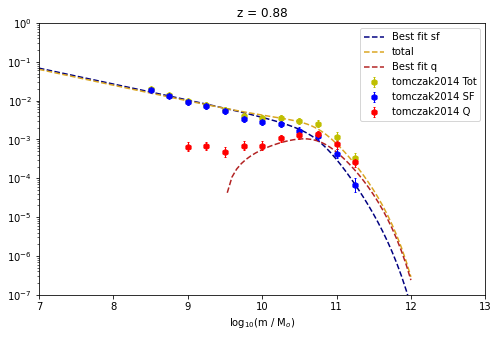

In [27]:
z = 0.875
# z = 1.75


fig, ax = pl.subplots(figsize=(8, 5))
Ms_short = np.linspace(7, 12, 80)

ls_best = pop_best.StellarMassFunction(z, Ms_short, sf_type='smf_sf')
ls_best_t = pop_best.StellarMassFunction(z, Ms_short, sf_type='smf_tot')


ls_best_q = pop_best.StellarMassFunction(z, Ms_short, sf_type='smf_q')


# print(ls_best)

ls_mean = pop_mean.StellarMassFunction(z, Ms_short, sf_type='smf_sf')

# ax = anl.ReconstructedFunction('galaxy_smf', ivar=[z, None], samples='all', color='lightskyblue', alpha=0.01, ax=ax)

obslf = ares.analysis.GalaxyPopulation()
# obslf.PlotSMF(z=z, ax=ax, round_z=0.2, log10Mass=True)
gpop.PlotSMF(z, sources="tomczak2014", color="y", ecolor='y', mec='y', label="tomczak2014 Tot", quantity="smf_tot", ax=ax, round_z=0.2, log10Mass=True)
gpop.PlotSMF(z, sources="tomczak2014",  label="tomczak2014 SF", color="b", ecolor='b',  mec='b', ax=ax, round_z=0.2, log10Mass=True)
gpop.PlotSMF(z, sources="tomczak2014", color="r", ecolor='r',  mec='r', label="tomczak2014 Q", quantity="smf_q", ax=ax, round_z=0.2, log10Mass=True)

pl.semilogy(Ms_short, ls_best, label='Best fit sf', color='navy', ls="--")
pl.semilogy(Ms_short, ls_best_t, label='total', color='goldenrod', ls="--")

pl.semilogy(Ms_short, ls_best_q, label='Best fit q', color='firebrick', ls="--")


# pl.semilogy(Ms_short, ls_mean, label='Mean fit')

pl.title("z = %.2f" %z)
pl.xlabel("log$_{10}$(m / M$_o$)")
pl.legend()
# pl.ylim(1e-15, 1e2)
pl.show()

(1.8715519745099205, array([0.23942869, 1.25330928]))
1.8715519745099205


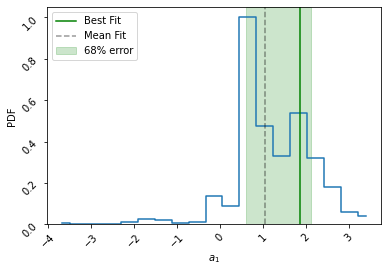

In [60]:
bests = [anl.get_1d_error(i, nu=0.68,  peak='mode') for i in params]
means = [anl.get_1d_error(i, nu=0.68,  peak='median') for i in params]
fit_best_like 

i = 0
print(bests[i])

# anl.get_1d_error(params[i], peak="median")

pars = ares.util.ParameterBundle("emma:model1")

print(fit_best_like[params[i]])
# pars_mean[params[i]]

ax = anl.PosteriorPDF(pars=params[i])

# pl.axvline(x=fit_best_like[params[i]], ls="-", color="red", label="Best Fit in range")

#best fit with mode
pl.axvline(x=bests[i][0], ls="-", color="green", label="Best Fit")
ax.axvspan(bests[i][0]-bests[i][1][1], bests[i][0]+bests[i][1][0], alpha=0.2, color='green' ,label="68% error")

#best fit with mode
# pl.axvline(x=bests_m[i][0], ls="-", color="purple", label="Best Fit Med")
# ax.axvspan(bests_m[i][0]-bests_m[i][1][1], bests_m[i][0]+bests_m[i][1][0], alpha=0.2, color='purple' ,label="68% error")

pl.axvline(x=means[i][0], ls="--", color="black", label="Mean Fit",  alpha=0.4)

pl.legend()
pl.show()

In [22]:
# ticks = np.linspace(0, len(anl.logL)-1, len(anl.logL))

# xstart = 30000

# maxL = anl.logL[31549]

# # print(anl.logL[35314])
# # print(anl.logL[1344-10:1344+10])

# pl.axvline(x=31549, color="yellow", label=str(maxL))

# pl.plot(ticks[xstart:], anl.logL[xstart:])
# pl.plot(ticks, anl.logL)
# pl.ylabel("logLikelihood")

# # pl.ylim(-500, 1500)
# pl.legend()
# pl.show()